多層のdeepencoderで、より少ない要素数で４と９を分離できるだろうか？

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
batch_size = 128
epochs = 300

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
keep_train_idx = np.logical_or(y_train == 4, y_train == 9)
keep_test_idx = np.logical_or(y_test ==4, y_test == 9)

x_train = x_train[keep_train_idx]
x_test = x_test[keep_test_idx]

In [5]:
x_train_vec = x_train.reshape(x_train.shape[0], 784)
x_test_vec = x_test.reshape(x_test.shape[0], 784)

中央の要素数は4個に設定する。

In [6]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(784, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 404       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               500       
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total para

In [7]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_vec, x_train_vec,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_vec, x_test_vec))
score = model.evaluate(x_test_vec, x_test_vec, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 11791 samples, validate on 1991 samples
Epoch 1/300
11791/11791 [==============================] - 1s - loss: 0.0772 - acc: 0.0077 - val_loss: 0.0528 - val_acc: 0.0095
Epoch 2/300
11791/11791 [==============================] - 1s - loss: 0.0531 - acc: 0.0072 - val_loss: 0.0518 - val_acc: 0.0095
Epoch 3/300
11791/11791 [==============================] - 0s - loss: 0.0524 - acc: 0.0079 - val_loss: 0.0510 - val_acc: 0.0095
Epoch 4/300
11791/11791 [==============================] - 1s - loss: 0.0512 - acc: 0.0083 - val_loss: 0.0490 - val_acc: 0.0090
Epoch 5/300
11791/11791 [==============================] - 1s - loss: 0.0494 - acc: 0.0087 - val_loss: 0.0474 - val_acc: 0.0095
Epoch 6/300
11791/11791 [==============================] - 1s - loss: 0.0483 - acc: 0.0088 - val_loss: 0.0464 - val_acc: 0.0085
Epoch 7/300
11791/11791 [==============================] - 1s - loss: 0.0477 - acc: 0.0090 - val_loss: 0.0459 - val_acc: 0.0105
Epoch 8/300
11791/11791 [==============================

11791/11791 [==============================] - 1s - loss: 0.0425 - acc: 0.0126 - val_loss: 0.0381 - val_acc: 0.0095
Epoch 65/300
11791/11791 [==============================] - 0s - loss: 0.0423 - acc: 0.0110 - val_loss: 0.0380 - val_acc: 0.0116
Epoch 66/300
11791/11791 [==============================] - 0s - loss: 0.0424 - acc: 0.0109 - val_loss: 0.0379 - val_acc: 0.0121
Epoch 67/300
11791/11791 [==============================] - 1s - loss: 0.0424 - acc: 0.0117 - val_loss: 0.0380 - val_acc: 0.0116
Epoch 68/300
11791/11791 [==============================] - 0s - loss: 0.0423 - acc: 0.0114 - val_loss: 0.0379 - val_acc: 0.0110
Epoch 69/300
11791/11791 [==============================] - 1s - loss: 0.0424 - acc: 0.0111 - val_loss: 0.0379 - val_acc: 0.0110
Epoch 70/300
11791/11791 [==============================] - 1s - loss: 0.0421 - acc: 0.0109 - val_loss: 0.0378 - val_acc: 0.0105
Epoch 71/300
11791/11791 [==============================] - 0s - loss: 0.0422 - acc: 0.0099 - val_loss: 0.0379

11791/11791 [==============================] - 0s - loss: 0.0412 - acc: 0.0104 - val_loss: 0.0363 - val_acc: 0.0105
Epoch 128/300
11791/11791 [==============================] - 1s - loss: 0.0412 - acc: 0.0098 - val_loss: 0.0364 - val_acc: 0.0100
Epoch 129/300
11791/11791 [==============================] - 0s - loss: 0.0411 - acc: 0.0110 - val_loss: 0.0363 - val_acc: 0.0110
Epoch 130/300
11791/11791 [==============================] - 0s - loss: 0.0412 - acc: 0.0114 - val_loss: 0.0363 - val_acc: 0.0100
Epoch 131/300
11791/11791 [==============================] - 0s - loss: 0.0410 - acc: 0.0109 - val_loss: 0.0364 - val_acc: 0.0110
Epoch 132/300
11791/11791 [==============================] - 0s - loss: 0.0410 - acc: 0.0097 - val_loss: 0.0364 - val_acc: 0.0105
Epoch 133/300
11791/11791 [==============================] - 0s - loss: 0.0411 - acc: 0.0107 - val_loss: 0.0363 - val_acc: 0.0121
Epoch 134/300
11791/11791 [==============================] - 1s - loss: 0.0412 - acc: 0.0109 - val_loss:

11791/11791 [==============================] - 1s - loss: 0.0407 - acc: 0.0098 - val_loss: 0.0359 - val_acc: 0.0116
Epoch 191/300
11791/11791 [==============================] - 0s - loss: 0.0406 - acc: 0.0097 - val_loss: 0.0359 - val_acc: 0.0095
Epoch 192/300
11791/11791 [==============================] - 0s - loss: 0.0404 - acc: 0.0096 - val_loss: 0.0360 - val_acc: 0.0146
Epoch 193/300
11791/11791 [==============================] - 0s - loss: 0.0404 - acc: 0.0110 - val_loss: 0.0359 - val_acc: 0.0110
Epoch 194/300
11791/11791 [==============================] - 1s - loss: 0.0403 - acc: 0.0099 - val_loss: 0.0360 - val_acc: 0.0126
Epoch 195/300
11791/11791 [==============================] - 1s - loss: 0.0403 - acc: 0.0109 - val_loss: 0.0360 - val_acc: 0.0085
Epoch 196/300
11791/11791 [==============================] - 0s - loss: 0.0405 - acc: 0.0092 - val_loss: 0.0361 - val_acc: 0.0110
Epoch 197/300
11791/11791 [==============================] - 0s - loss: 0.0405 - acc: 0.0106 - val_loss:

11791/11791 [==============================] - 0s - loss: 0.0398 - acc: 0.0098 - val_loss: 0.0361 - val_acc: 0.0095
Epoch 254/300
11791/11791 [==============================] - 0s - loss: 0.0398 - acc: 0.0091 - val_loss: 0.0362 - val_acc: 0.0116
Epoch 255/300
11791/11791 [==============================] - 0s - loss: 0.0401 - acc: 0.0110 - val_loss: 0.0361 - val_acc: 0.0100
Epoch 256/300
11791/11791 [==============================] - 0s - loss: 0.0399 - acc: 0.0114 - val_loss: 0.0361 - val_acc: 0.0110
Epoch 257/300
11791/11791 [==============================] - 0s - loss: 0.0399 - acc: 0.0110 - val_loss: 0.0361 - val_acc: 0.0110
Epoch 258/300
11791/11791 [==============================] - 0s - loss: 0.0399 - acc: 0.0103 - val_loss: 0.0361 - val_acc: 0.0121
Epoch 259/300
11791/11791 [==============================] - 1s - loss: 0.0397 - acc: 0.0108 - val_loss: 0.0363 - val_acc: 0.0116
Epoch 260/300
11791/11791 [==============================] - 1s - loss: 0.0397 - acc: 0.0109 - val_loss:

## Testing results 

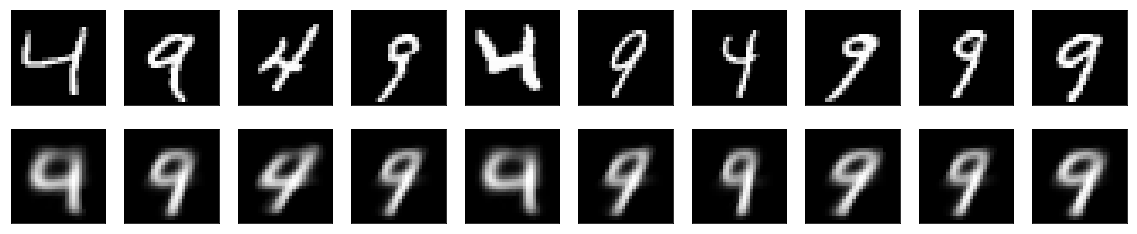

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    predicted = model.predict(x_train_vec[i:i+1]).reshape((28,28))
    plt.imshow(predicted)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

４の中には上がくっついて９になりかけているものもあるが、なかなか頑張っているのではないだろうか。勝手に理想を言うと、上の段が”４”だった場合下の段には”平均的な４”、上の段が”９”だった場合下の段には”平均的な９”が表れてくれるとうれしい。しかし実際には、４のなかにも相当ばらつきがあるため、再表現出力の形状はばらつく入力の形に引っ張られるように変わってしまう。とはいえ、”９”の再表現形は互いにかなり良く揃っていると思う。

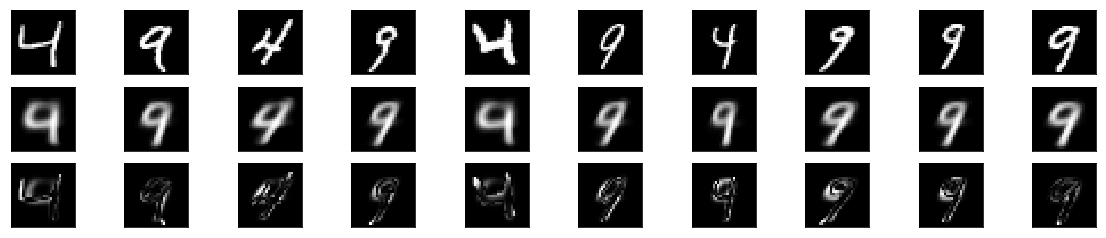

In [10]:
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    indata = x_train[i].reshape(28, 28)
    plt.imshow(indata)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    predicted = model.predict(x_train_vec[i:i+1]).reshape((28,28))
    plt.imshow(predicted)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow((indata - predicted)**2)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

入力から出力を引き算したもの（の2乗）を3段目に並べてみた。再表現出力は集合全体を考慮して計算した予測値のようなものだから、入力が極端に予測から外れれば、外れた部分が誤差として際立って表される。これは使い方によっては役立つ可能性がある。